In [111]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Imports: pip install -r requirements.txt
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
import numpy as np

In [112]:
# Get the values & pieces from the TetraVex game
# Values are for visualization
# Pieces are for the algorithm
def getValuesAndPieces(file):
    north = []
    east = []
    south = []
    west = []
    pieces = {}
    i = 0
    for line in file:
        sides = line.split(" ")
        pieces[i] = [int(sides[0]), int(sides[1]), int(sides[2]), int(sides[3])]
        i += 1
        north.append([int(sides[0])])
        east.append([int(sides[1])])
        south.append([int(sides[2])])
        west.append([int(sides[3])])

    values = [north, east, south, west]
    print("values: " + str(values))
    print("pieces: " + str(pieces))
    return values, pieces

In [113]:
def visualizeBoard(values, sizeBoard):
    xv, yv = np.meshgrid(np.arange(-0.5, sizeBoard), np.arange(-0.5, sizeBoard))  # vertices of the little squares
    xc, yc = np.meshgrid(np.arange(0, sizeBoard), np.arange(0, sizeBoard))  # centers of the little squares
    x = np.concatenate([xv.ravel(), xc.ravel()])
    y = np.concatenate([yv.ravel(), yc.ravel()])
    cstart = (sizeBoard + 1) * (sizeBoard + 1)  # indices of the centers

    trianglesN = [(i + j * (sizeBoard + 1), i + 1 + j * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    trianglesE = [(i + 1 + j * (sizeBoard + 1), i + 1 + (j + 1) * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    trianglesS = [(i + 1 + (j + 1) * (sizeBoard + 1), i + (j + 1) * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    trianglesW = [(i + (j + 1) * (sizeBoard + 1), i + j * (sizeBoard + 1), cstart + i + j * sizeBoard)
                    for j in range(sizeBoard) for i in range(sizeBoard)]
    triangul = [Triangulation(x, y, triangles) for triangles in [trianglesN, trianglesE, trianglesS, trianglesW]]

    cmaps = 'tab10' # Color map based out of 10 colors
    fig, ax = plt.subplots()
    imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmaps, vmin=0, vmax=9, ec='white')
                for t, val in zip(triangul, values)]

    # TODO Add text (nog te fixen)
    # for val, dir in zip(values, [(-1, 0), (0, 1), (1, 0), (0, -1)]):
    #     for i in range(M):
    #         for j in range(N):
    #             v = val[j, i]
    #             ax.text(i + 0.3 * dir[1], j + 0.3 * dir[0], f'{v:.2f}', color='k' if 0.2 < v < 0.8 else 'w', ha='center', va='center')
    # cbar = fig.colorbar(imgs[0], ax=ax)

    ax.set_xticks(range(sizeBoard))
    ax.set_yticks(range(sizeBoard))
    ax.invert_yaxis()
    ax.margins(x=0, y=0)
    ax.set_aspect('equal', 'box')  # square cells
    plt.tight_layout()
    plt.show()

values: [[[8], [8], [1], [9]], [[9], [5], [8], [3]], [[1], [9], [1], [0]], [[4], [9], [8], [8]]]
pieces: {0: [8, 9, 1, 4], 1: [8, 5, 9, 9], 2: [1, 8, 1, 8], 3: [9, 3, 0, 8]}


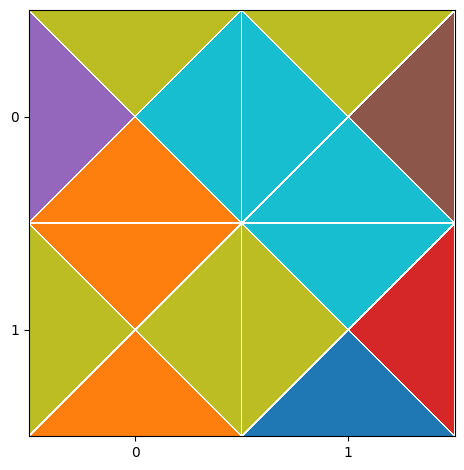

In [114]:
# Solution
sizeBoard = 2
file = open("./dataFiles/TetraVex_2x2_Solution.txt", "r")
values, pieces = getValuesAndPieces(file)
visualizeBoard(values, sizeBoard)

values: [[[8], [9], [1], [8]], [[9], [3], [8], [5]], [[1], [0], [1], [9]], [[4], [8], [8], [9]]]
pieces: {0: [8, 9, 1, 4], 1: [9, 3, 0, 8], 2: [1, 8, 1, 8], 3: [8, 5, 9, 9]}


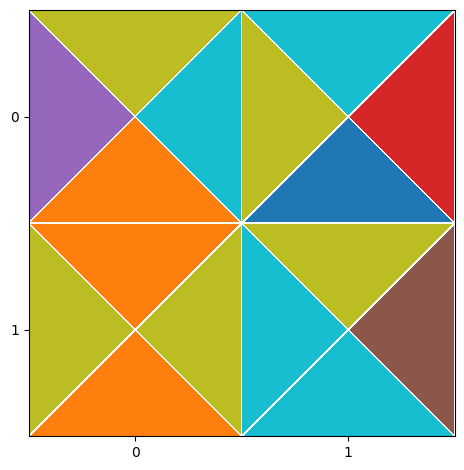

In [151]:
# Start board
sizeBoard = 2
file = open("./dataFiles/TetraVex_2x2.txt", "r")
values, pieces = getValuesAndPieces(file)
visualizeBoard(values, sizeBoard)

{(0, 1, 1): [(0, 0, 2)], (0, 0, 2): [(0, 1, 1)], (1, 0, 1): [(0, 0, 3)], (0, 0, 3): [(1, 0, 1)], (1, 1, 1): [(0, 1, 3)], (0, 1, 3): [(1, 1, 1), (0, 0, 0)], (1, 0, 2): [(0, 0, 0)], (0, 0, 0): [(1, 0, 2), (0, 1, 3)], (1, 1, 2): [(0, 1, 0)], (0, 1, 0): [(1, 1, 2)]}


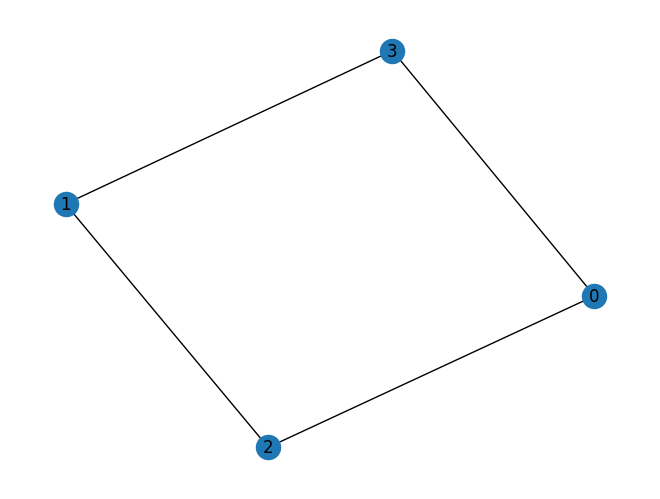

In [152]:
# Build Graph
size = len(pieces)
graph = {}
for piece1, colors1 in pieces.items():
    for row in range(sizeBoard):
        for col in range(sizeBoard):
            for piece2, colors2 in pieces.items():
                node1 = (row, col, piece1)
                node2 = (row, col-1, piece2)
                if piece1 == piece2:
                    continue
                # graph.setdefault(piece1, []).append(piece2)

                if row > 0:
                    node2 = (row-1, col, piece2)
                    if colors1[0] != colors2[2]:
                        continue
                    graph.setdefault(node1, []).append(node2)
                    graph.setdefault(node2, []).append(node1)


                if col > 0:
                    node2 = (row, col-1, piece2)
                    if colors1[3] != colors2[1]:
                        continue 
                    graph.setdefault(node1, []).append(node2)
                    graph.setdefault(node2, []).append(node1)


                    # or value1[2] == value2[0] \
                    # or value1[3] == value2[1] or value1[0] == value2[2]:        
        
            # print(str(key1) + " " + str(key2) + " " + str(value1[1]) + " " + str(value2[3]))
            # print(str(key1) + " " + str(key2) + " " + str(value1[2]) + " " + str(value2[0]))
print(graph)
G = nx.Graph()
G.add_nodes_from(pieces.keys())
for node, edges in graph.items():
    for edge in edges:
        G.add_edge(node[2], edge[2])
nx.draw(G, with_labels = True)
plt.show()

In [153]:
def is_clique(graph, nodes):
  for node in nodes:
    for neighbor in graph[node]:
      if neighbor not in nodes:
        continue  # Skip non-adjacent neighbors
      if not any(val in graph[neighbor] for val in graph[node]):
        return False
  return True

def backtrack(graph, nodes, current_clique, max_clique):
  if len(max_clique) == len(pieces):
    return  # No need to continue if the current clique already contains all nodes

  if len(current_clique) > len(max_clique):
    print(current_clique)
    max_clique.clear()
    max_clique.update(current_clique)
  
  for node in nodes.copy():
    nodes.remove(node)
    current_clique.add(node)
    if is_clique(graph, current_clique):
      backtrack(graph.copy(), nodes.copy(), current_clique.copy(), max_clique)
    current_clique.remove(node)
    nodes.add(node)


In [154]:
print(graph)
print(len(graph))
nodes = set(graph.keys())
print(len(nodes))
print(len(graph.keys()))
print(nodes)
current_clique = set()
max_clique = set()
backtrack(graph, nodes, current_clique, max_clique)
print(max_clique)

{(0, 1, 1): [(0, 0, 2)], (0, 0, 2): [(0, 1, 1)], (1, 0, 1): [(0, 0, 3)], (0, 0, 3): [(1, 0, 1)], (1, 1, 1): [(0, 1, 3)], (0, 1, 3): [(1, 1, 1), (0, 0, 0)], (1, 0, 2): [(0, 0, 0)], (0, 0, 0): [(1, 0, 2), (0, 1, 3)], (1, 1, 2): [(0, 1, 0)], (0, 1, 0): [(1, 1, 2)]}
10
10
10
{(1, 0, 1), (0, 1, 0), (0, 0, 3), (0, 1, 3), (0, 0, 0), (1, 1, 2), (0, 0, 2), (1, 0, 2), (1, 1, 1), (0, 1, 1)}
{(1, 0, 1)}
{(1, 0, 1), (0, 1, 0)}
{(1, 0, 1), (0, 1, 0), (0, 1, 3)}
{(1, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 3)}
{(1, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 3)}


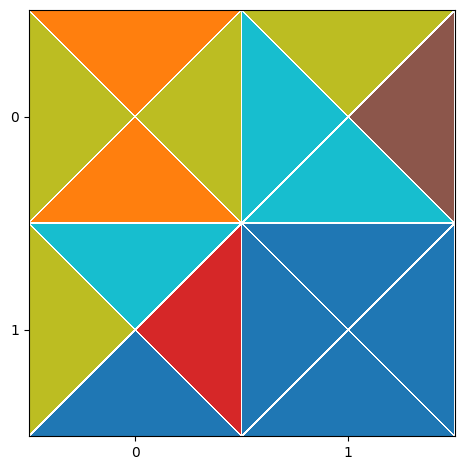

In [155]:
north = [0] * (sizeBoard * sizeBoard)
east = [0] * (sizeBoard * sizeBoard)
south = [0] * (sizeBoard * sizeBoard)
west = [0] * (sizeBoard * sizeBoard)

for node in max_clique:
    if(node[0] == 0):
        north[node[1]] = pieces.get(node[2])[0]
        east[node[1]] = pieces.get(node[2])[1]
        south[node[1]] = pieces.get(node[2])[2]
        west[node[1]] = pieces.get(node[2])[3]
    if(node[0] == 1):
        north[node[1] + sizeBoard] = pieces.get(node[2])[0]
        east[node[1] + sizeBoard] = pieces.get(node[2])[1]
        south[node[1] + sizeBoard] = pieces.get(node[2])[2]
        west[node[1] + sizeBoard] = pieces.get(node[2])[3]
values = [north, east, south, west]
visualizeBoard(values, sizeBoard)